In [1]:
%matplotlib notebook

In [2]:
import os
import sys
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import animation, rc
from mpl_toolkits.mplot3d.axes3d import Axes3D

import seaborn

from IPython.display import HTML

In [3]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from regression_models import PolynomialRegression

## Data Preparation

### Gathering

In [5]:
X_data = [[],[],[],[]]
Y_data = []

In [6]:
D = {}

In [7]:
runs = 10
steps = 10

for depth in range(1, 5):
    for run in range(1, runs + 1):
        dir_input = "sims/cat_mouse/data/" + str(depth) + "/data" + str(run) + ".txt"
        with open(os.path.abspath(os.path.join('..', dir_input))) as f:
            for line in f.readlines():
                line = list(map(int, line.split()))
                for i in range(2, 12):
                    X_data[0].append((i - 1) * steps)
                    X_data[1].append(depth)
                    X_data[2].append(line[0])
                    X_data[3].append(line[1])
                    Y_data.append(line[i])
                    
                    temp = ((i - 1) * steps, depth, line[0], line[1])
                    if temp in D:
                        D[temp] += line[i]
                    else:
                        D[temp] = line[i]

In [8]:
X_data = np.array(X_data)
Y_data = np.array(Y_data)

### Summarization

In [9]:
X_ave = [[], [], [], []]
Y_ave = []

D_ave = {}

In [10]:
for key in D:
    X_ave[0].append(key[0])
    X_ave[1].append(key[1])
    X_ave[2].append(key[2])
    X_ave[3].append(key[3])
    Y_ave.append(D[key] / 10)
    
    D_ave[key] = D[key] / 10

### Creation of mesh grids

In [11]:
n = 11

In [12]:
X_domain = np.linspace(0, 10, n)

In [13]:
X = np.zeros((4, n, n))
X[0] = np.full((1), 10)
X[1] = np.full((1), 1)
X[2], X[3] = np.meshgrid(X_domain, X_domain)

In [14]:
Y = np.zeros((n, n))
for key in D:
    Y[key[2]][key[3]] = D_ave[key]

## Data Visualization

### Regression

In [15]:
model = PolynomialRegression(X, Y)

#### Linear model

In [16]:
lin_model = model.process(degree=1)
lin_model.print_func()

29.749469*1 + 297.494693*x0 + 29.749469*x1 + 138.662479*x2 + 159.525372*x3


In [17]:
print(lin_model.r_squared)

0.0880789761939


#### Quadratic model

In [18]:
quad_model = model.process(degree=2)
quad_model.print_func()

0.501608*1 + 5.016080*x0 + 0.501608*x1 + -3.997161*x2 + -6.547150*x3 + 50.160797*x0^2 + 5.016080*x0*x1 + -39.971612*x0*x2 + -65.471500*x0*x3 + 0.501608*x1^2 + -3.997161*x1*x2 + -6.547150*x1*x3 + 53.492350*x2^2 + 2.289884*x2*x3 + 81.588525*x3^2


In [19]:
print(quad_model.r_squared)

0.234550755051


#### Cubic model

In [20]:
cube_model = model.process(degree=3)
cube_model.print_func()

0.005483*1 + 9262698166570.201172*x0 + 302749695175184.750000*x1 + 281079028787113.531250*x2 + 46700099791972.148438*x3 + 121352806086838.265625*x0^2 + 48269477719411.250000*x0*x1 + -517356201176512.125000*x0*x2 + 73324759467216.703125*x0*x3 + 106262417462870.156250*x1^2 + -123640774994665.328125*x1*x2 + 518398536704190.562500*x1*x3 + -100509774789038.750000*x2^2 + -5000128703440.218750*x2*x3 + 15342479367922.976562*x3^2 + -12956075585016.656250*x0^3 + -2147587832461.107422*x0^2*x1 + 48727480466725.062500*x0^2*x2 + -13980872806369.375000*x0^2*x3 + 5119603139817.255859*x0*x1^2 + 14383265825453.744141*x0*x1*x2 + 9668319956092.234375*x0*x1*x3 + 8730865705289.000000*x0*x2^2 + 346480395027.843750*x0*x2*x3 + -3174977258377.031250*x0*x3^2 + 23856688542.341675*x1^3 + -456946955413.986816*x1^2*x2 + 3057849907237.409180*x1^2*x3 + 13201117736289.066406*x1*x2^2 + 1535324753270.419922*x1*x2*x3 + 16407293215826.804688*x1*x3^2 + -2.125000*x2^3 + -10.625000*x2^2*x3 + 0.031250*x2*x3^2 + 6.781250*x3^3


In [21]:
print(cube_model.r_squared)

0.252251921923


#### Crazy Model

In [22]:
crazy_model = model.process(degree=18)
crazy_model.print_func()

0.000000*1 + -0.000000*x0 + 0.000000*x1 + 0.000000*x2 + -0.000000*x3 + -0.000000*x0^2 + 0.000000*x0*x1 + -0.000000*x0*x2 + -0.000000*x0*x3 + 0.000000*x1^2 + 0.000000*x1*x2 + 0.000000*x1*x3 + 0.000000*x2^2 + -0.000000*x2*x3 + -0.000000*x3^2 + 0.000000*x0^3 + 0.000000*x0^2*x1 + 0.000000*x0^2*x2 + -0.000000*x0^2*x3 + 0.000000*x0*x1^2 + 0.000000*x0*x1*x2 + 0.000000*x0*x1*x3 + 0.000000*x0*x2^2 + 0.000000*x0*x2*x3 + -0.000000*x0*x3^2 + 0.000000*x1^3 + 0.000000*x1^2*x2 + -0.000000*x1^2*x3 + -0.000000*x1*x2^2 + -0.000000*x1*x2*x3 + -0.000000*x1*x3^2 + -0.000000*x2^3 + -0.000000*x2^2*x3 + -0.000000*x2*x3^2 + -0.000000*x3^3 + -0.000000*x0^4 + 0.000000*x0^3*x1 + -0.000000*x0^3*x2 + 0.000000*x0^3*x3 + -0.000000*x0^2*x1^2 + -0.000000*x0^2*x1*x2 + -0.000000*x0^2*x1*x3 + -0.000000*x0^2*x2^2 + -0.000000*x0^2*x2*x3 + 0.000000*x0^2*x3^2 + -0.000000*x0*x1^3 + -0.000000*x0*x1^2*x2 + -0.000000*x0*x1^2*x3 + 0.000000*x0*x1*x2^2 + -0.000000*x0*x1*x2*x3 + 0.000000*x0*x1*x3^2 + -0.000000*x0*x2^3 + -0.000000*x0*

In [23]:
print(crazy_model.r_squared)

0.997724308005


### Plotting

<IPython.core.display.Javascript object>


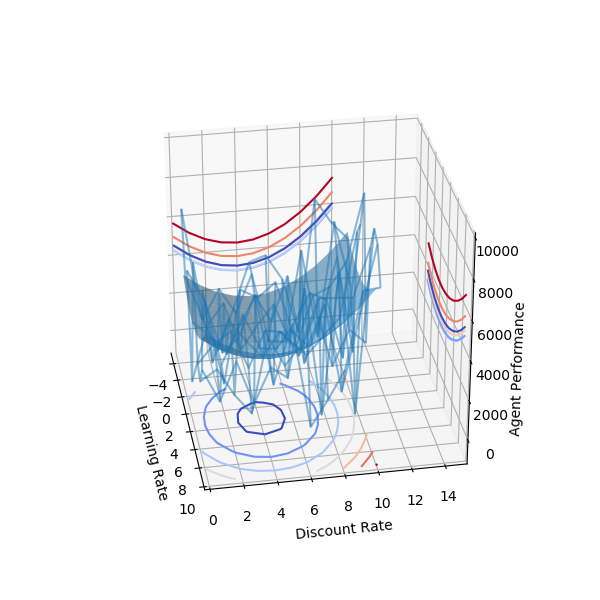

In [31]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

p = model.plot(ax, X[2], X[3], Y, idx=(2, 3), wireframe=True, show_contours=False)
model.plot(ax, X[2], X[3], PolynomialRegression(X, Y, degree=2).predict(), 
           idx=(2,3), lims=((-5, 10), (0, 15), (-1000, 10000)),
           show_labels=True, labels=("Learning Rate", "Discount Rate", "Agent Performance"))
# plt.show()
for ii in range(0,360,10):
        ax.view_init(elev=30., azim=ii)
        plt.savefig("movie%d.png" % ii)